In [2]:
from inference_sdk import InferenceHTTPClient
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="K6PV1UeuN30UNJXyH7fB"
)
# result = CLIENT.infer(your_image.jpg, model_id="dmd-tfiw0/6")

In [3]:
# X = np.load('../data/data_aug_2000.npy').tolist()
# y = pd.read_csv('../data/labels_aug_2000.csv')
classes_test_og = pd.read_csv('../data/test/_classes.csv', delimiter=',', index_col=0).to_numpy()
filenames = pd.read_csv('../data/test/_classes.csv')["filename"]

In [4]:
X_aug = np.load('../data/X_aug.npy')
y_aug = np.load('../data/y_aug.npy')
from sklearn.model_selection import train_test_split
X_aug_train_val, X_aug_test, y_aug_train_val, y_aug_test = train_test_split(X_aug, y_aug, test_size=0.07, random_state=42)
X_aug_train, X_aug_val, y_aug_train, y_aug_val = train_test_split(X_aug_train_val, y_aug_train_val, test_size=0.14, random_state=42)

j = 0
for i in X_aug_test:
    cv2.imwrite(f'../data/test_set_final/test{j}.jpg', i * 255)
    j+=1



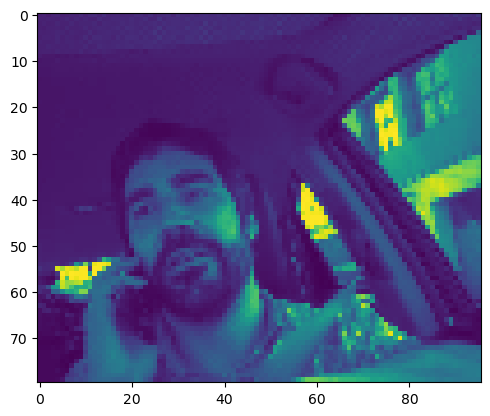

In [5]:
plt.imshow(X_aug_test[0])

In [6]:
# result = CLIENT.infer('/home/maxm/driver_inattention_detection/data/test/gA_1_s1_ir_face_mp4-89_jpg.rf.6d2ce17d7848ff67351b2419a702a087.jpg', model_id="dmd-tfiw0/6")
predictions = []
for i in filenames:
    result = CLIENT.infer(f'/home/maxm/driver_inattention_detection/data/test/{i}', model_id="dmd-tfiw0/6")
    predictions.append(result["predictions"])



In [7]:
j = 0
for i in predictions:
    print(i)
    print(classes_test_og[j])
    j += 1


[{'x': 236.0, 'y': 198.0, 'width': 118.0, 'height': 146.0, 'confidence': 0.8229001760482788, 'class': 'SafeDriving', 'class_id': 3, 'detection_id': 'e808e439-5b94-4064-b996-01c6226a58f1'}]
[0 0 0 1 0 0]
[{'x': 255.5, 'y': 207.0, 'width': 123.0, 'height': 148.0, 'confidence': 0.8203540444374084, 'class': 'Yawn', 'class_id': 5, 'detection_id': '31d3c947-0188-4367-9a8c-3e63b8167567'}]
[0 0 0 0 0 1]
[{'x': 152.5, 'y': 209.5, 'width': 305.0, 'height': 247.0, 'confidence': 0.7614160180091858, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': '14cbfe21-067c-4b22-accf-a50b80654b54'}]
[1 0 0 0 0 0]
[]
[0 0 0 1 0 0]
[{'x': 234.5, 'y': 189.5, 'width': 231.0, 'height': 215.0, 'confidence': 0.7038680911064148, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': '1f34143d-ec12-40f3-beb1-1d0c94c960bb'}]
[1 0 0 0 0 0]
[{'x': 139.0, 'y': 202.0, 'width': 262.0, 'height': 278.0, 'confidence': 0.8649988770484924, 'class': 'DangerousDriving', 'class_id': 0, 'detection_id': 'fa32ec5c-d71e-

In [43]:
# vec = [0, 0, 0, 0, 0, 0]
j = 0
k = 0
y_robo_pred = []
y_true_vec = []
for i in predictions:
    if i == []:
        # y_robo_pred.append(7)
        # y_true_vec.append(classes_test_og[j])
        j += 1
        k += 1
    else:
        y_robo_pred.append(i[0]['class_id'])
        y_true_vec.append(classes_test_og[j])
        j+=1
# print(j, len(predictions))

In [44]:
y_true = []
for i in range(len(y_true_vec)):
    h = np.where(y_true_vec[i] == 1)[0][0]
    y_true.append(h)
print(y_true)
print(y_robo_pred)

[3, 5, 0, 0, 0, 0, 3, 3, 3, 0, 3, 2, 3, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 5, 3, 1, 1, 1, 0, 3, 0, 0, 3, 0, 3, 0, 1, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 1, 0, 4, 1, 2, 0, 0, 3, 5, 0, 3, 3, 2, 4, 1, 0, 5, 1, 0, 3, 0, 0, 3, 3, 1, 0, 3, 0, 4, 1, 3, 3, 4, 1, 3, 0, 0, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 0, 0, 4, 3, 3, 3, 3, 0, 1, 0, 3, 0, 3, 3, 3, 1, 0, 0, 1, 4, 0, 5, 1, 0, 0, 0, 3, 1, 3, 1, 1, 0, 0, 3, 3, 3, 0, 4, 1, 3, 3, 1, 3, 3, 0, 3, 4, 3, 0, 3, 0, 1, 0, 3, 0, 3, 5, 0, 2, 0, 3, 4, 1, 3, 0, 3, 3, 3, 3, 0, 1, 5, 0, 4, 1, 0, 1, 3, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 3, 3, 1, 1, 0, 5, 1, 1, 0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 5, 1, 3, 0, 3, 3, 5, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 5, 3, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0, 3, 3, 0, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3, 0, 0, 0, 1, 1, 3, 3, 3, 0, 3, 

7


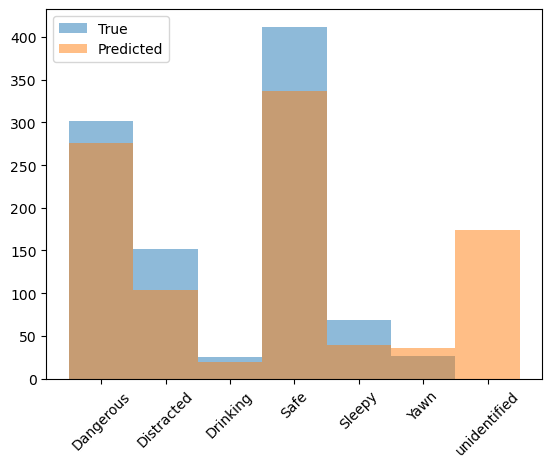

In [26]:

labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn', 'unidentified']
plt.hist(y_true, bins = [0, 1, 2, 3, 4, 5, 6], alpha=0.5, label='True')
num = plt.hist(y_robo_pred, bins=7, alpha=0.5, label='Predicted')
edges = num[1]
bin_centers = 0.5 * (edges[:-1] + edges[1:])
print(len(bin_centers))
plt.xticks(bin_centers, labels, rotation=45)
plt.legend(loc='upper left')
plt.show()

174


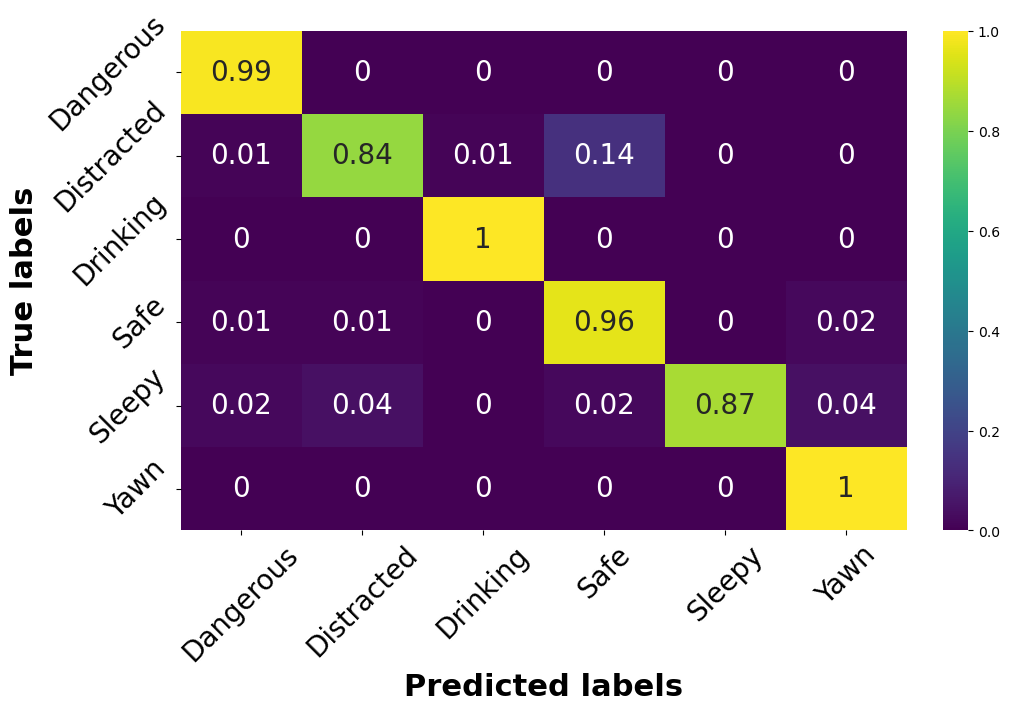

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(k)
plt.figure(constrained_layout=True, figsize=(10, 7))
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn', 'unidentified']
cm = confusion_matrix(y_true, y_robo_pred)
#normalize each column
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#delete last row 
# cm = np.delete(cm, 6, 0)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels[:6], yticklabels=labels[:6], annot_kws={"size": 20}, cmap = 'viridis')
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=45, fontsize = 20)
plt.xlabel('Predicted labels', fontsize = 22, fontweight='bold')
plt.ylabel('True labels', fontsize = 22, fontweight='bold')
# plt.show()
plt.savefig('../plotting/conf_matr/confusion_matrix_robo_better.png')

In [32]:
print(classification_report(y_true, y_robo_pred, target_names=labels[:6]))
crp = classification_report(y_true, y_robo_pred, output_dict=True, target_names=labels[:6])
print(accuracy_score(y_true, y_robo_pred))
print(f1_score(y_true, y_robo_pred, average='weighted'))
print(precision_score(y_true, y_robo_pred, average='weighted'))
print(recall_score(y_true, y_robo_pred, average='weighted'))

              precision    recall  f1-score   support

   Dangerous       0.98      0.99      0.99       274
  Distracted       0.95      0.84      0.89       118
    Drinking       0.95      1.00      0.97        18
        Safe       0.94      0.96      0.95       331
      Sleepy       1.00      0.87      0.93        45
        Yawn       0.69      1.00      0.82        25

    accuracy                           0.95       811
   macro avg       0.92      0.94      0.93       811
weighted avg       0.95      0.95      0.95       811

0.9494451294697904
0.9496825306418685
0.9532862843191003
0.9494451294697904


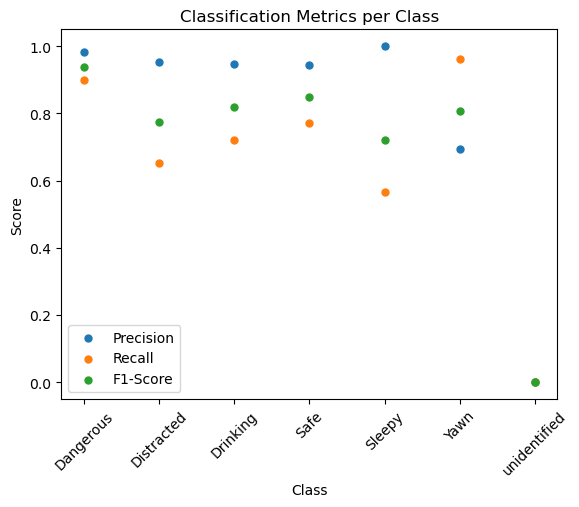

In [ ]:

precision = [crp[label]['precision'] for label in labels]
recall = [crp[label]['recall'] for label in labels]
f1_score = [crp[label]['f1-score'] for label in labels]

# Plotting
plt.figure()
plt.scatter(labels, precision, label='Precision', marker = 'o', s = 25)
plt.scatter(labels, recall, label='Recall', marker = 'o', s = 25)
plt.scatter(labels, f1_score, label='F1-Score', marker = 'o', s = 25)
plt.legend()
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.title('Classification Metrics per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.show()